## FrozenLake-v1

Here is a [better rendering](https://nbviewer.org/github/facebookresearch/Pearl/blob/main/tutorials/frozen_lake/frozen_lake.ipynb) of this notebook on [nbviewer](https://nbviewer.org/).

This example shows how to use DQN to solve the `FrozenLake-v1` environment from gymnasium. This environment has observations as indices (tabular observation)which is not suitable for learning with a neural network. In what follows, we show how to use Pearl's `OneHotObservationsFromDiscrete` wrapper to convert observations to their one-hot representations.

In [ ]:
%load_ext autoreload
%autoreload 2

## Installation
If you haven't installed Pearl, please make sure you install Pearl with the following cell. Otherwise, you can skip the cell below.

In [ ]:
%pip uninstall Pearl -y
%rm -rf Pearl
!git clone https://github.com/facebookresearch/Pearl.git
%cd Pearl
%pip install .
%cd ..

Cloning into 'Pearl'...
remote: Enumerating objects: 6409, done.
remote: Counting objects: 100% (1554/1554), done.
remote: Compressing objects: 100% (378/378), done.
remote: Total 6409 (delta 1322), reused 1262 (delta 1175), pack-reused 4855 (from 1)
Receiving objects: 100% (6409/6409), 55.14 MiB | 9.88 MiB/s, done.
Resolving deltas: 100% (4377/4377), done.
/content/Pearl
Processing /content/Pearl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 46.6 MB/s eta 0:00:00
  Created wheel for Pearl: filename=Pearl-0.1.0-py3-none-any.whl siz

## Import Modules

In [ ]:
from pearl.utils.functional_utils.experimentation.set_seed import set_seed
from pearl.policy_learners.sequential_decision_making.deep_q_learning import DeepQLearning
from pearl.replay_buffers import BasicReplayBuffer
from pearl.utils.functional_utils.train_and_eval.online_learning import online_learning
from pearl.pearl_agent import PearlAgent
from pearl.utils.instantiations.environments.gym_environment import GymEnvironment
from pearl.utils.instantiations.environments.environments import (
    OneHotObservationsFromDiscrete,
)
from pearl.utils.instantiations.spaces.discrete import DiscreteSpace
import torch
import matplotlib.pyplot as plt
import numpy as np
from pearl.action_representation_modules.one_hot_action_representation_module import (
    OneHotActionTensorRepresentationModule,
)

set_seed(0)

## Vanilla DQN

episode 2, step 147, agent=PearlAgent with DeepQLearning, BasicReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 3, step 247, agent=PearlAgent with DeepQLearning, BasicReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 4, step 347, agent=PearlAgent with DeepQLearning, BasicReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 6, step 427, agent=PearlAgent with DeepQLearning, BasicReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 9, step 540, agent=PearlAgent with DeepQLearning, BasicReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 10, step 640, agent=PearlAgent with DeepQLearning, BasicReplayBuffer, env=One-hot observations on FrozenLake-v1 from FrozenLake-v1
return: 0.0
episode 11, step 716, agent=PearlAgent with DeepQLearning, BasicReplayBuffer, env=One-hot observati

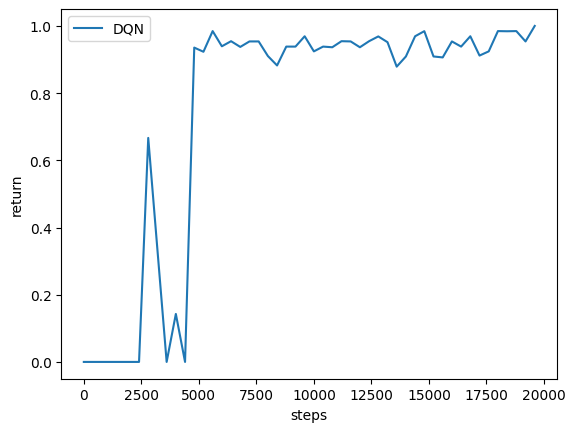

In [ ]:
number_of_steps = 20000
record_period = 400

"""
This test is checking if DQN will eventually solve FrozenLake-v1
whose observations need to be wrapped in a one-hot representation.
"""
env = OneHotObservationsFromDiscrete(
    GymEnvironment(
        "FrozenLake-v1", is_slippery=False, map_name="4x4",
    )
)

action_representation_module = OneHotActionTensorRepresentationModule(
    max_number_actions= env.action_space.n,
)

assert isinstance(env.action_space, DiscreteSpace)
state_dim = env.observation_space.n
agent = PearlAgent(
    policy_learner=DeepQLearning(
        state_dim=state_dim,
        action_space=env.action_space,
        hidden_dims=[64, 64],
        training_rounds=1,
        action_representation_module=action_representation_module
    ),
    replay_buffer=BasicReplayBuffer(1000),
)

info = online_learning(
    agent=agent,
    env=env,
    number_of_steps=number_of_steps,
    print_every_x_steps=100,
    record_period=record_period,
    learn_after_episode=False,
)
torch.save(info["return"], "DQN-return.pt")
plt.plot(record_period * np.arange(len(info["return"])), info["return"], label="DQN")
plt.xlabel("steps")
plt.ylabel("return")
plt.legend()
plt.show()